# 1. **Bar Graph Analysis (Each State Frequency)**

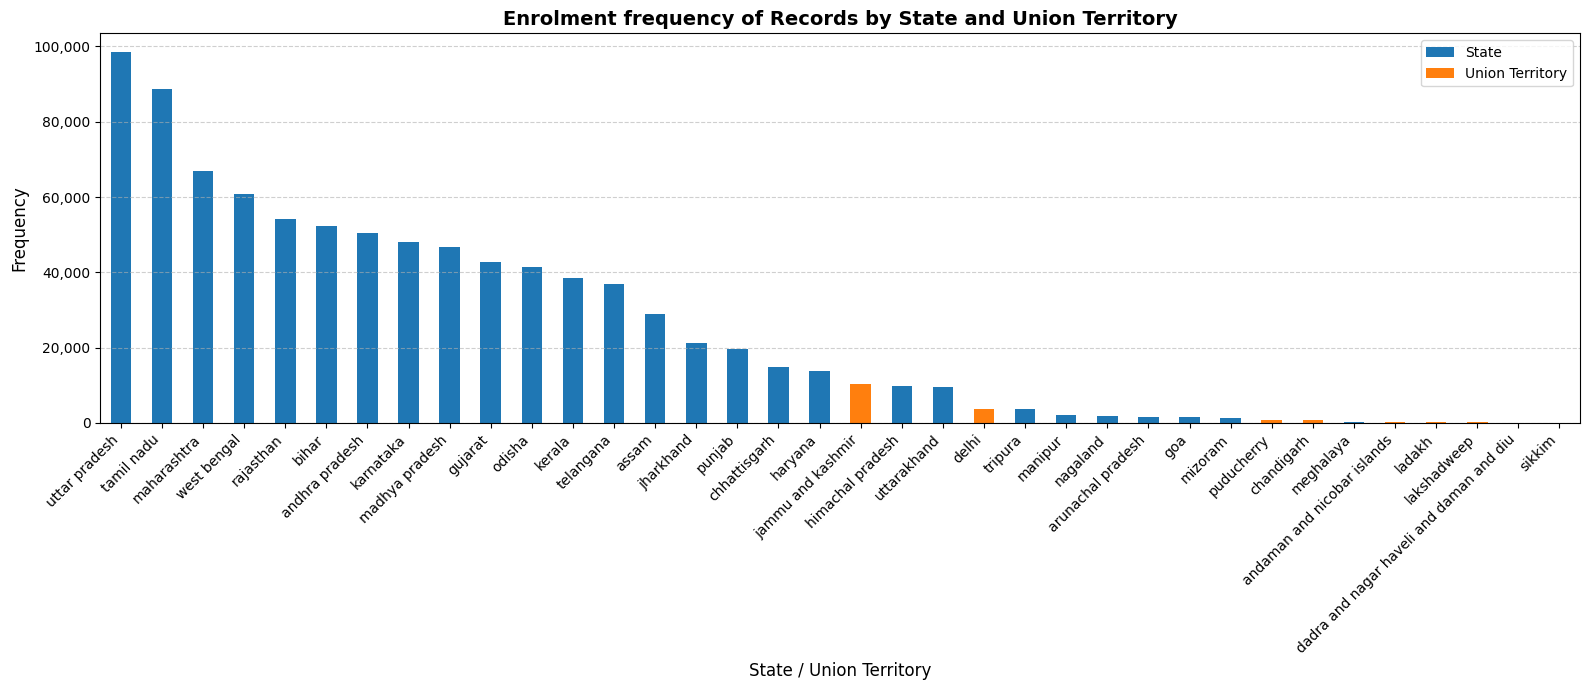

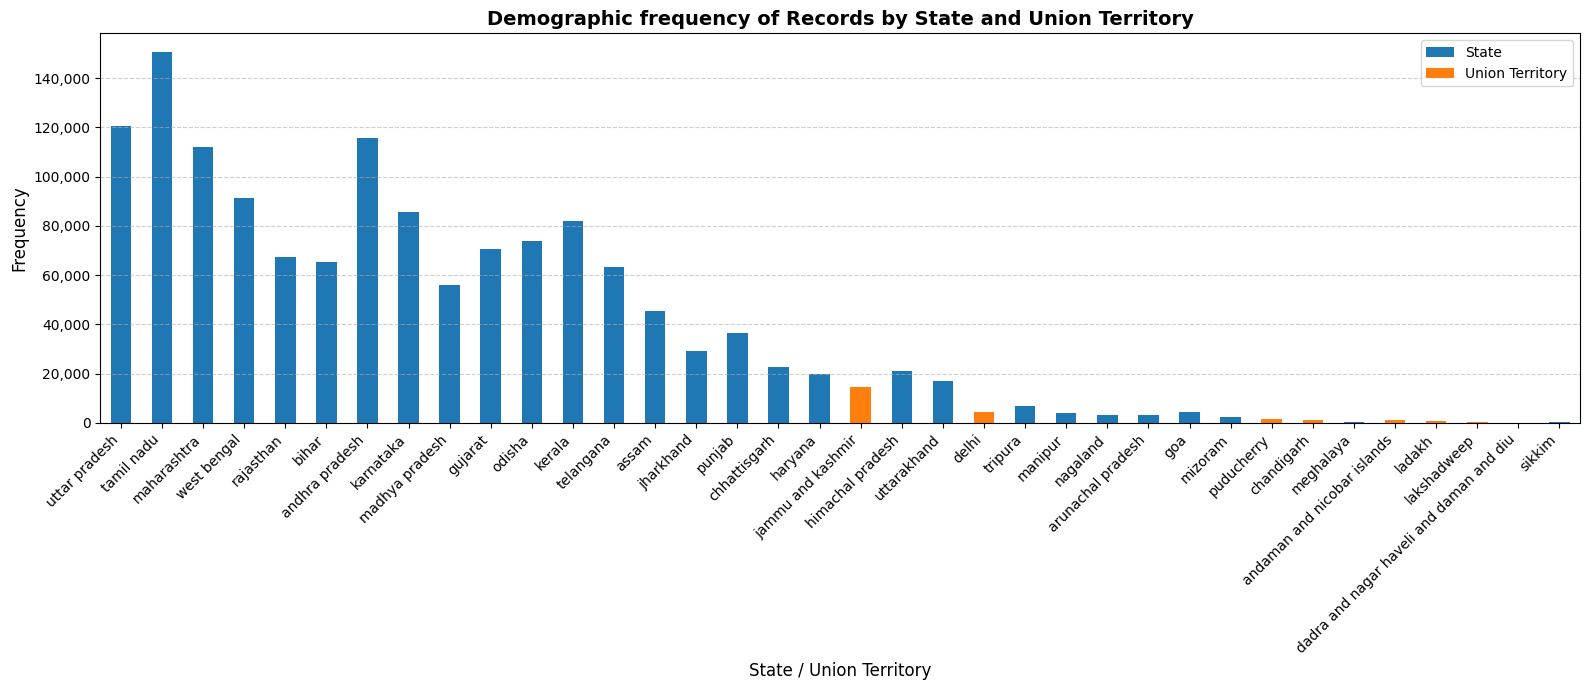

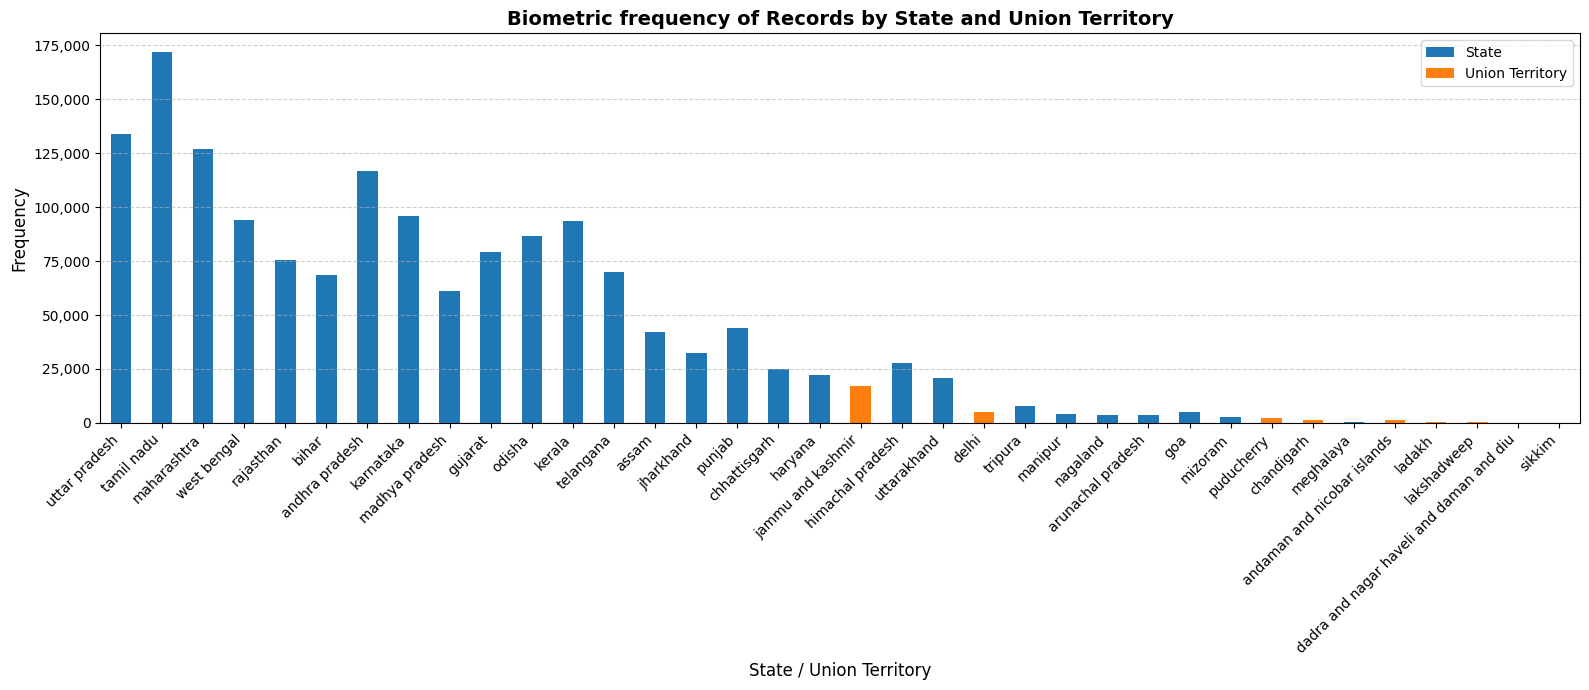

# 1.1 Top State Comparison: Key Findings


1.  Uttar Pradesh (UP), with a population of ~241 Million, generated 98,558 new enrollments. In contrast, Tamil Nadu (TN), with a much smaller population of ~75 Million, generated 88,758 new enrollments—nearly matching UP's absolute numbers.
2.   When normalized against the population base, the disparity becomes mathematically distinct. Uttar Pradesh's enrollment volume represents a capture rate of approximately $\frac{98,558}{200,000,000}$ (approx. 0.041%), whereas Tamil Nadu's volume represents a much denser rate of $\frac{88,758}{75,000,000}$ (approx. 0.115%). This reveals that Tamil Nadu is generating enrollments at a relative intensity nearly 3 times greater than Uttar Pradesh, proving that despite UP's higher absolute numbers, its operational efficiency per unit of population is significantly lower.
3. It indicates superior operational efficiency in Tamil Nadu. The state is aggressively capturing its remaining unregistered population, whereas Uttar Pradesh shows signs of service under-penetration, failing to generate volume proportional to its massive demographic scale.
4. This operational advantage is not limited to enrollments alone. Tamil Nadu also records markedly higher biometric and demographic data volumes than Uttar Pradesh, strongly corroborating the state’s superior execution and deeper population coverage.



# 1.2 Sikkim Anomaly
1. Across almost all states & UT's, the ratio of Biometric Updates to Demographic Updates is remarkably consistent, hovering around 1.1 to 1.15. (e.g., Tamil Nadu: 1.14, UP: 1.11, Maharashtra: 1.13).

2. A critical discrepancy exists in the operational data for Sikkim, characterised by a massive imbalance between Demographic and Biometric transaction volumes.


*   Demographic Activity: 185 entries were recorded.
*   Biometric Activity: Only 5 entries were recorded.
*   The Disparity: This results in a 0.027 (Bio: Demo), significantly deviating from the national average where these two activities usually remain comparable (approx. 1:1.5).

3. The presence of a large volume of eligible adults processing text-based/online updates without corresponding biometric scans confirms a systemic hardware or process failure in the region. Biometric capture devices were likely non-functional or offline, forcing a fallback to demographic-only processing.

4. Now, we can think that this can be a noise because of small population of sikkim, but even in other region with very low activity (e.g., Dadra & Nagar Haveli & Daman and Diu with only ~160 records of demographic & Biometric updates), the ratio stays balanced (around 0.8 to 1.1). Sikkim is the only region where the ratio(Bio:Demo) explodes to 0.027( 1:37). This proves that the issue isn't "Small Population Noise" but a specific operational failure in that state. If it were just noise, we would see random swings in Ladakh or Lakshadweep too, but we don't.

So, we can confidently state this as a real problem.





# 2. **Correlation Analysis**

# 2.1 The "Parent-Child" Update Sync

# Do Child Enrollments Drive Adult Aadhaar Updates? A Correlation Analysis



In [9]:
import pandas as pd
df_enrol = pd.read_csv('/content/enrol_cleaned_final_for_analysis.csv')
df_demo = pd.read_csv('/content/demo_cleaned_final_for_analysis.csv')
df_bio = pd.read_csv('/content/bio_cleaned_final_for_analysis.csv')

In [17]:
df_enrol.groupby('state')['age_0_5'].mean().corr(
    df_demo.groupby('state')['demo_age_17_'].mean()
)

np.float64(0.8657959259606719)

In [18]:
df_enrol.groupby('state')['age_0_5'].mean().corr(
    df_bio.groupby('state')['bio_age_17_'].mean()
)

np.float64(0.8477557703692995)

1. We found a remarkably high correlation (~0.85) between Enrol Child (0-5) and Demo & Bio Adult(17+)

2. Finding: When parents visit a center to enroll their newborn (Age 0-5), they likely use that same trip to update their own
demographic & Biometric details. The data suggests a "Family Visit Pattern" where one trip serves multiple purposes: enrolling the
baby and fixing the parents' data.

## The above thing can be completely become true by Calculating the coefficient of Determination ($R^2$ ), which tells how much the Y is being explained by X.

In [55]:
# Align data at state level
aligned_df = (
    df_demo.groupby('state')['demo_age_17_'].sum().to_frame().join(df_enrol.groupby('state')['age_0_5'].sum(),how='inner'))

# R-squared (square of Pearson correlation)
r2 = aligned_df['demo_age_17_'].corr(aligned_df['age_0_5']) ** 2
r2

np.float64(0.8744195809149057)

### We can see the value, it's completely explaining that Parent-child Analogy

# 2.2 Stability Analysis: The Coefficient of Variation (CV)

# To understand the operational nature of Aadhaar services—specifically whether different services function as routine daily operations or as episodic, event-driven activities—we analyzed their Coefficient of Variation (CV).


*   Metric Used: $CV = \frac{\sigma}{\mu} \ $ (Standard Deviation divided by Mean).Significance: A low CV indicates consistent, stable daily operations. A high CV (>>1) indicates high variation, means there are some quite times, that the event didn't even happen.



In [19]:
df_bio['bio_age_17_'].std() / df_bio['bio_age_17_'].mean()


np.float64(4.470976469802917)

In [20]:
df_demo['demo_age_17_'].std() / df_demo['demo_age_17_'].mean()


np.float64(5.584409017905097)

In [21]:
df_enrol['age_18_greater'].std() / df_enrol['age_18_greater'].mean()


np.float64(14.550357607037842)


1.   Observation:
The CV for new adult enrollments (18+) is extremely high (>14).
2.  This pattern strongly indicates that adult Aadhaar enrollment has reached a mature and highly efficient stage. The majority of the adult population is already enrolled, reflecting the successful and widespread implementation of Aadhaar across the country. Consequently, new adult enrollments are no longer part of routine daily operations.

3. The very high coefficient of variation further indicates the presence of extended low-activity or zero-activity periods, during which no adult enrollment occurs at many centers. Enrollment activity surfaces only during short, high-intensity windows, typically driven by targeted government initiatives such as special camps, outreach programs for migrant populations, or backlog clearance drives.

4. Importantly, this behavior is a positive operational signal. It demonstrates that Aadhaar resources are not continuously deployed when demand is absent, but are instead activated precisely when required, ensuring efficient use of infrastructure and manpower rather than maintaining idle daily capacity.


### Let's Verify the same with number of zeroes in the adult enrolments

In [24]:
df_enrol[df_enrol['age_18_greater']==0]['age_18_greater'].count()

np.int64(838771)

# 2.3 Quartile Analysis

## To understand how busy different Aadhaar centers really are, we looked beyond mean and standard deviation, Averages don’t show the full picture — quartiles help us see how Aadhaar centers actually work

# Analyzing first by IQR (Inter Quartile Range)

## Here, to assess the operational workload of Aadhaar centers, we focus only on biometric data. This is because the majority of activities at Aadhaar centers involve updates rather than fresh enrollments, and biometric updates are mandatory in-person processes that can only be completed at physical centers. In contrast, many demographic updates can now be performed through online channels, making them a less reliable indicator of actual center-level activity.

In [44]:
def iqr_calculator(df, state: str, value_col: str = 'bio_age_17_') -> float:
    """
    Calculates the Interquartile Range (IQR) of center-level workload
    for a given state.
    """
    df_state = df_bio[df_bio['state'] == state]

    center_totals = (df_state.groupby('pincode')[value_col].sum())

    q1 = center_totals.quantile(0.25)
    q3 = center_totals.quantile(0.75)

    print('Q1: ',q1)
    print('Q3: ',q3)
    iqr = q3 - q1
    print('IQR is:' ,iqr)


In [45]:
iqr_calculator(df_bio,'delhi')

Q1:  1700.75
Q3:  8907.25
IQR is: 7206.5


In [46]:
iqr_calculator(df_bio, 'assam')

Q1:  139.0
Q3:  763.25
IQR is: 624.25


In [47]:
iqr_calculator(df_bio, 'chhattisgarh')

Q1:  2111.0
Q3:  8519.25
IQR is: 6408.25


In [48]:
iqr_calculator(df_bio, 'kerala')

Q1:  291.0
Q3:  889.0
IQR is: 598.0


In [49]:
iqr_calculator(df_bio, 'maharashtra')

Q1:  751.25
Q3:  4572.75
IQR is: 3821.5


In [51]:
iqr_calculator(df_bio, 'andhra pradesh')

Q1:  329.5
Q3:  1068.5
IQR is: 739.0


In [52]:
iqr_calculator(df_bio, 'odisha')

Q1:  615.0
Q3:  1768.25
IQR is: 1153.25


In [53]:
iqr_calculator(df_bio, 'assam')

Q1:  139.0
Q3:  763.25
IQR is: 624.25


## Key Things:

1.   In these states, the "Middle 50%" of centers have a massive gap in performance. There is no standard operational capacity. A "typical" center could be doing 1,000 updates or 8,000 updates.

2. Chhattisgarh (IQR = 6,408): Usually, high variation is bad. But here, Q1 is High (2,111).
This means all centers are busy, but some are extremely busy. It’s a "Good Problem"—the network is active everywhere, just unevenly loaded.

3. Maharashtra (IQR = 3,821):
Q1 is just 751, but Q3 is 4,572.
Massive disparity between rural (Q1) and urban (Q3) centers. The "middle class" of centers doesn't really exist; you either have small rural spots or busy town hubs. The same is being explained by higher IQR.

4. Kerala (IQR = 598):
Q1 is 291, Q3 is 889.
Highly standardized. Whether you go to a center in Kasaragod or Kollam, the operational load is roughly the same. This indicates a very planned, decentralized distribution of centers.

5. Andhra Pradesh (IQR = 739):
Similar to Kerala. The network is consistent. Resource planning is easy here because every center has a predictable load.

So we can summarize the key findings as follows


*   Most Unequal Experience: Delhi & Maharashtra (Depends heavily on which center you pick).
*  Most Uniform Experience: Kerala & Odisha (Consistent service levels almost everywhere).
*   Most Chaotic / Unpredictable: Assam (High relative variation: IQR/Median).





## In such way we can see various centers functionality in various states.





## 2.4 Are Biometric and Demographic Updates Truly Separate, or Do They Move Together?

## Common perception suggests that if one updates biometrics, they also update demographics. However, our correlation analysis proves this false: while co-located at the same centers, these are distinct user journeys that do not move in lockstep.


--- Statistical Findings ---
Correlation Coefficient (r): 0.7739
Coefficient of Determination (R^2): 0.5989


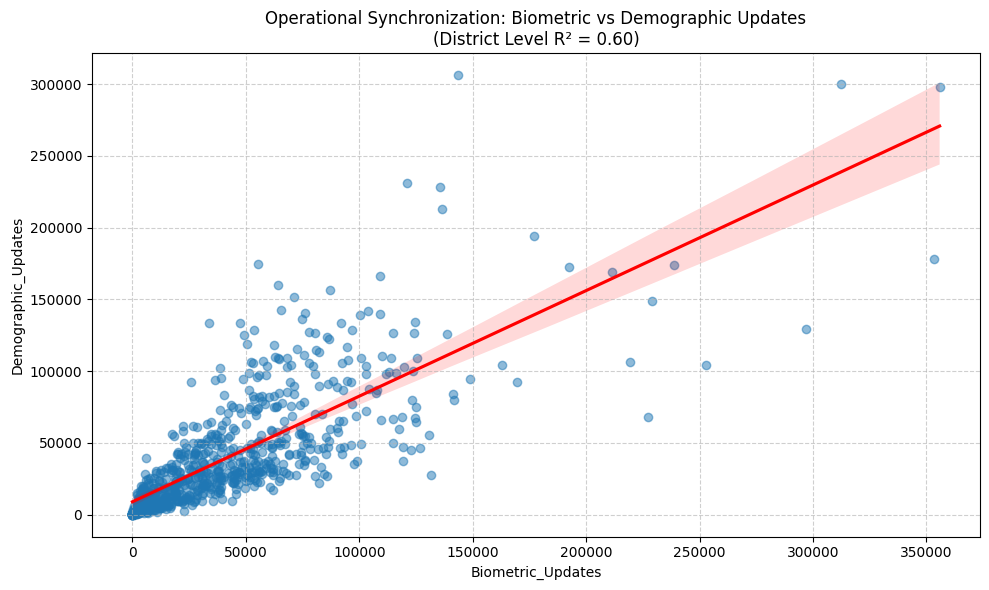

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Focusing on ADULTS (17+) as they drive the volume
bio_district = df_bio.groupby(['state', 'district'])['bio_age_17_'].sum().reset_index()
demo_district = df_demo.groupby(['state', 'district'])['demo_age_17_'].sum().reset_index()


# This ensures we only compare districts that exist in both datasets
merged_df = pd.merge(bio_district, demo_district, on=['state', 'district'])

# Rename columns for cleaner graph labels
merged_df.rename(columns={'bio_age_17_': 'Biometric_Updates', 'demo_age_17_': 'Demographic_Updates'}, inplace=True)

# Calculate R-Squared (Pearson Correlation ^ 2)
correlation = merged_df['Biometric_Updates'].corr(merged_df['Demographic_Updates'])
r_squared = correlation ** 2

print(f"--- Statistical Findings ---")
print(f"Correlation Coefficient (r): {correlation:.4f}")
print(f"Coefficient of Determination (R^2): {r_squared:.4f}")

#  Generate the Regression Plot
plt.figure(figsize=(10, 6))

# sns.regplot
sns.regplot(
    data=merged_df,
    x='Biometric_Updates',
    y='Demographic_Updates',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title(f'Operational Synchronization: Biometric vs Demographic Updates\n(District Level R² = {r_squared:.2f})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show
plt.savefig('biometric_demographic_correlation.png')
plt.show()

# The correlation ($R^2 = 0.59$) indicates that Biometric and Demographic services are delivered through a unified infrastructure (co-located at the same centers). However, the lack of a near-perfect correlation ($R^2 < 0.9$) demonstrates that these are independent user journeys. Citizens visit centers for specific, distinct needs—either a mandatory biometric refresh or a voluntary demographic correction—rather than consuming both services as a bundle.

# 2.5 Least Square Method Analysis

## The "Zero-Intercept" Mystery: Behavioral Gap or Technical Barrier?

## Let's first make a Linear Regression line

In [61]:
import numpy as np

aligned_df = (df_bio.groupby('state')['bio_age_17_'].mean().to_frame().join(df_demo.groupby('state')['demo_age_17_'].mean(),how='inner'))

x = aligned_df['bio_age_17_'].values     # independent variable
y = aligned_df['demo_age_17_'].values    # dependent variable

slope, intercept = np.polyfit(x, y, 1)

print(f"demo_age_17_ = {intercept:.3f} + {slope:.3f} × bio_age_17_")


demo_age_17_ = 0.027 + 1.045 × bio_age_17_


1.  ##  The regression analysis yields a near-zero intercept ($0.027$) for Adult Demographic updates.
2. ##   Meaning: When physical centers are closed (Biometric = 0), Demographic updates stop completely (it's also nearly zero). The "Online/Self-Service" channel is effectively inactive.

## The "Unknown Variable": Why is the Online Channel Silent? While this confirms "Total Center Dependency," the root cause represents a critical "Known Unknown" that requires further data to investigate. The inactivity is driven by one of two distinct factors:

### Hypothesis A: The Behavioral Barrier (Digital Literacy)
1. The Scenario: Citizens have their mobile numbers linked but lack the awareness or confidence to use the Self-Service Update Portal (SSUP).

2. The Fix: Information Education & Communication (IEC) campaigns (e.g., YouTube tutorials, ads).

### Hypothesis B: The Structural Barrier (Mobile Linkage)
1. The Scenario: Citizens want to use the online portal, but cannot because their mobile number is not linked to Aadhaar (a mandatory prerequisite for OTP authentication).
2. The Constraint: Without a linked mobile number, the online door is locked. These citizens are forced to visit a center just to link their mobile, making the "Center Dependency" structural, not behavioral.

### *Conclusion & Strategic Idea:* We cannot definitively solve this "Zero-Intercept" mystery without analyzing "Mobile Saturation Data" (percentage of Aadhaar holders with linked mobiles).

1. If Mobile Linkage is High (>80%): The problem is Behavioral. The strategy must be Digital Awareness.

2. If Mobile Linkage is Low (<40%): The problem is Structural. The strategy must be Mobile Seeding Camps to unlock the online potential for the population.


## Why we have analyzed only adult age for least square method?

### Answer:
1. The regression equation for the 5-17 age group differs fundamentally from that of adults:
$$Demographic\_Updates_{(5-17)} = -0.376 + 0.157 \times (Biometric\_Updates_{(5-17)})$$

2. The slope is extremely low (0.157), compared to 1.045 for adults.For every 100 children visiting a center, only ~15 perform a demographic update. This confirms that child visits are driven almost exclusively by Mandatory Biometric Updates (at ages 5 and 15). Demographic changes are merely incidental side-effects of these mandatory visits, not the primary driver.

3. The intercept is negative (effectively zero in real terms).
There is zero independent demand for child demographic updates. Unlike adults, children do not have a "Digital Gap" because they do not have a choice. Their primary requirement—the Mandatory Biometric Update—requires physical hardware (iris/fingerprint scanners) and cannot be performed online.

In [63]:
import numpy as np

aligned_df = (
    df_bio.groupby('state')['bio_age_5_17'].mean().to_frame().join(df_demo.groupby('state')['demo_age_5_17'].mean(),how='inner'))

x = aligned_df['bio_age_5_17'].values     # independent variable
y = aligned_df['demo_age_5_17'].values    # dependent variable

slope, intercept = np.polyfit(x, y, 1)

print(f"demo_age_5_17 = {intercept:.3f} + {slope:.3f} × bio_age_5_17")


demo_age_5_17 = -0.376 + 0.157 × bio_age_5_17


# 3. **Probability**, The Efficiency Matrix: A Bayesian Probability Analysis


## In the previous sections, we analyzed states based on Total Volume. However, volume can be misleading: a large state (like Uttar Pradesh) may generate high volume simply because it has thousands of centers, even if many are inefficient.

## To uncover the true "Operational Health" of each state, we applied Bayesian Probability Theory. This allows us to separate Scale (Size) from Efficiency (Quality).

## The Probability Framework
## We defined a "Successful Center" ($H$) as any center performing in the Top 25% of national capacity. We then calculated two critical probabilities for each state:
1. Operational Efficiency ($P(H \mid S)$):
  *   Question: "If a citizen walks into a random center in this State ($S$), what is the probability it is a High-Performing center ($H$)?"
  *   Significance: This measures the Quality of Management. A high score means the state runs a "tight ship"—almost every center is productive.

2. Market Dominance ($P(S \mid H)$)::
  *   Question: "If we look at the pool of High-Performing centers in India ($H$), what is the probability the center belongs to this State ($S$)?"
  *   Significance: This measures Sheer Scale. A high score means the state contributes a lot to the national total, often just because it is geographically large.






In [66]:
import pandas as pd

# Event S: Center belongs to State | Event H: Center is High Performing (>75th Percentile)
center_data = df_bio.groupby(['state', 'pincode'])['bio_age_17_'].sum().reset_index()
threshold = center_data['bio_age_17_'].quantile(0.75)
center_data['is_high_perf'] = center_data['bio_age_17_'] >= threshold  #The top-25 filtering out.

# 2. Probability Calculation
stats = center_data.groupby('state').agg(
    Total_Centers=('is_high_perf', 'count'),
    High_Perf_Centers=('is_high_perf', 'sum')
).reset_index()

# Filter for robust states (>50 centers)
stats = stats[stats['Total_Centers'] > 50].copy()

# Calculate Conditional Probabilities
# P(H|S): Efficiency = High_Perf_in_State / Total_in_State
stats['Efficiency_P(H|S)'] = stats['High_Perf_Centers'] / stats['Total_Centers']

# P(S|H): Dominance = High_Perf_in_State / Total_High_Perf_Nation
stats['Dominance_P(S|H)'] = stats['High_Perf_Centers'] / stats['High_Perf_Centers'].sum()

# 3. Output the Matrix
print(stats.sort_values('Efficiency_P(H|S)', ascending=False))

                state  Total_Centers  High_Perf_Centers  Efficiency_P(H|S)  \
6        chhattisgarh            248                187           0.754032   
8               delhi             58                 41           0.706897   
19     madhya pradesh            755                453           0.600000   
4               bihar            822                462           0.562044   
14          jharkhand            351                188           0.535613   
20        maharashtra           1494                769           0.514726   
11            haryana            270                136           0.503704   
27             punjab            511                174           0.340509   
13  jammu and kashmir            184                 62           0.336957   
28          rajasthan            961                302           0.314256   
33      uttar pradesh           1634                504           0.308446   
32            tripura             86                 24         

## Observation:
1. Uttar Pradesh:
   *  Uttar Pradesh has the highest Dominance ($P(S|H)$), meaning it contributes the most high-performing centers to the national pool.
   *   Its Efficiency ($P(H|S)$) is mediocre (~30%).
   *   UP dominates purely because of sheer size. It has thousands of centers, so statistically, some are bound to be good. However, for every 1 "Good" center, it carries the weight of 1.5 "Bad" centers. It is a resource-heavy, inefficient model.

2. Chhattisgarh & Delhi:
    *  These states have extremely high Efficiency ($P(H|S) > 0.75$).
    *  Their Dominance is low (<10%).

3. Assam & Uttarakhand:
    *  Both Efficiency and Dominance are near zero.
    *  This confirms a systemic infrastructure failure. The low efficiency (<10%) means that 9 out of 10 centers listed on paper are essentially non-functional. The state relies entirely on a few massive "Super-Hubs" (outliers) while the rest of the network is a "Ghost."

## Scale Paradox (Concluding):
  Comparing UP vs. Chhattisgarh proves that Bigger $\neq$ Better.
  If the goal is to expand the Aadhaar network efficiently, copying UP's model is a mistake (it's bloated). The data suggests replicating Chhattisgarh's "Quality-First" model is the superior strategy for resource management.

# This analysis moves beyond "Who has the most updates?" to the much more valuable question: "Who manages their network best?"